In [5]:
import numpy as np
import os
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
ticks = ['correctness', 'data coverage', 'relevance', 'fluency', 'text structure', 
         'bert precision', 'bert recall', 'bert F1', 'bleurt', 'bleu', 'ter', 'questeval', 'questeval_vanilla',
         'all_bs160_allneg', 'all_bs192_hardneg', 'cross_all_bs160_allneg', 
         'finetuned_cross_all_bs160_allneg', 'finetuned_cross_all_bs192_hardneg',
         'finetuned_cross_all_bs320_vanilla', 'finetuned_cross_all-mpnet-base-v2', 
         'finetuned_bi_all_bs160_allneg', 'finetuned_bi_all_bs192_hardneg',
         'finetuned_bi_all_bs320_vanilla', 'finetuned_bi_all-mpnet-base-v2',
        'ensemble']

In [7]:
data = json.load(open("2020_scores.json"))
# data["ter"] = [-item for item in data["ter"]]
data["ensemble"] = [(item[0] + item[1]) / 2 
                    for item in zip(data["finetuned_cross_all_bs160_allneg"], data["finetuned_bi_all_bs160_allneg"])]

In [8]:
data.keys()

dict_keys(['correctness', 'data coverage', 'relevance', 'fluency', 'text structure', 'bert precision', 'bert recall', 'bert F1', 'bleurt', 'bleu', 'ter', 'all_bs160_allneg', 'all_bs192_hardneg', 'cross_all_bs160_allneg', 'finetuned_cross_all_bs192_hardneg', 'finetuned_cross_all_bs160_allneg', 'finetuned_cross_all_bs320_vanilla', 'finetuned_cross_all-mpnet-base-v2', 'finetuned_bi_all_bs192_hardneg', 'finetuned_bi_all_bs160_allneg', 'finetuned_bi_all_bs320_vanilla', 'finetuned_bi_all-mpnet-base-v2', 'questeval', 'questeval_vanilla', 'rdf', 'text', 'ensemble'])

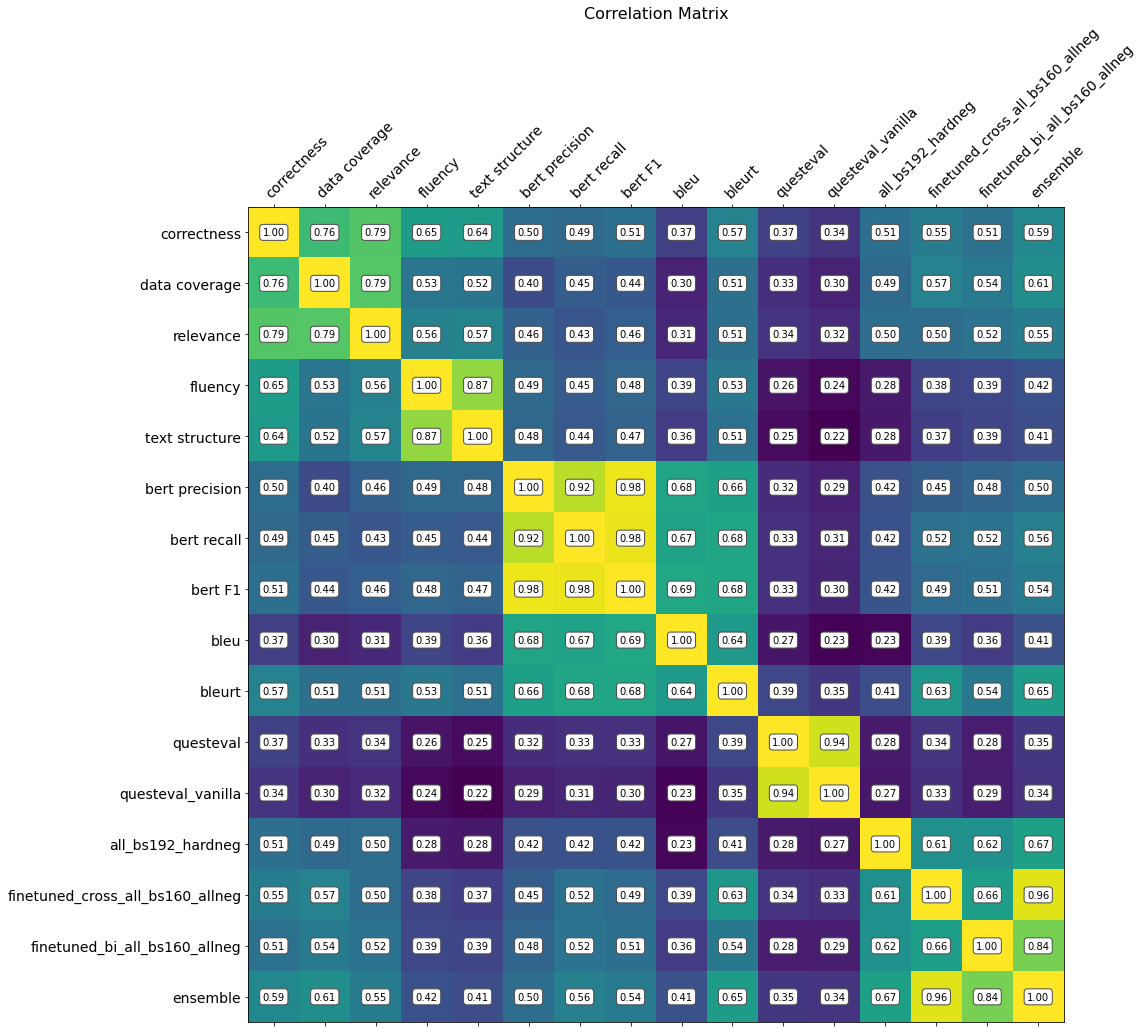

In [9]:
ticks = ['correctness', 'data coverage', 'relevance', 'fluency', 'text structure', 
         'bert precision', 'bert recall', 'bert F1', 'bleu', 'bleurt', 'questeval', 'questeval_vanilla',
         'all_bs192_hardneg',
         'finetuned_cross_all_bs160_allneg',
         'finetuned_bi_all_bs160_allneg',
        'ensemble']

correlations = np.corrcoef(np.stack([data[tick] for tick in ticks]))
f = plt.figure(figsize=(19, 15))
ax = plt.axes()
ax.matshow(correlations)
for (i, j), z in np.ndenumerate(correlations):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.xticks(range(len(ticks)), ticks, fontsize=14, rotation=45, ha='left', rotation_mode='anchor')
plt.yticks(range(len(ticks)), ticks, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

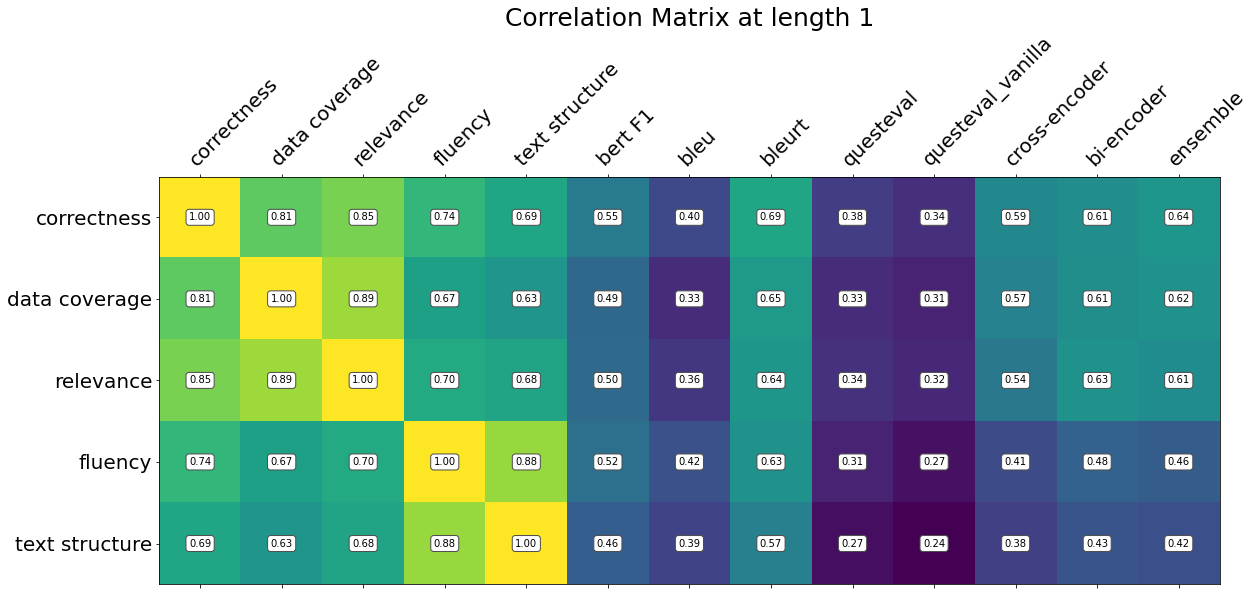

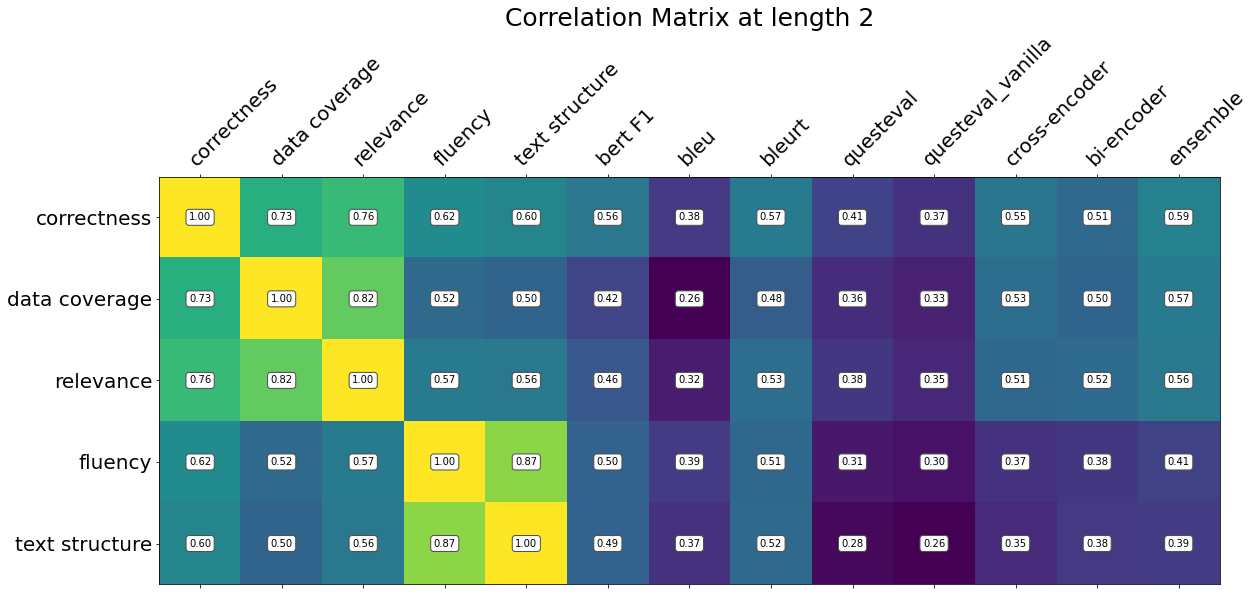

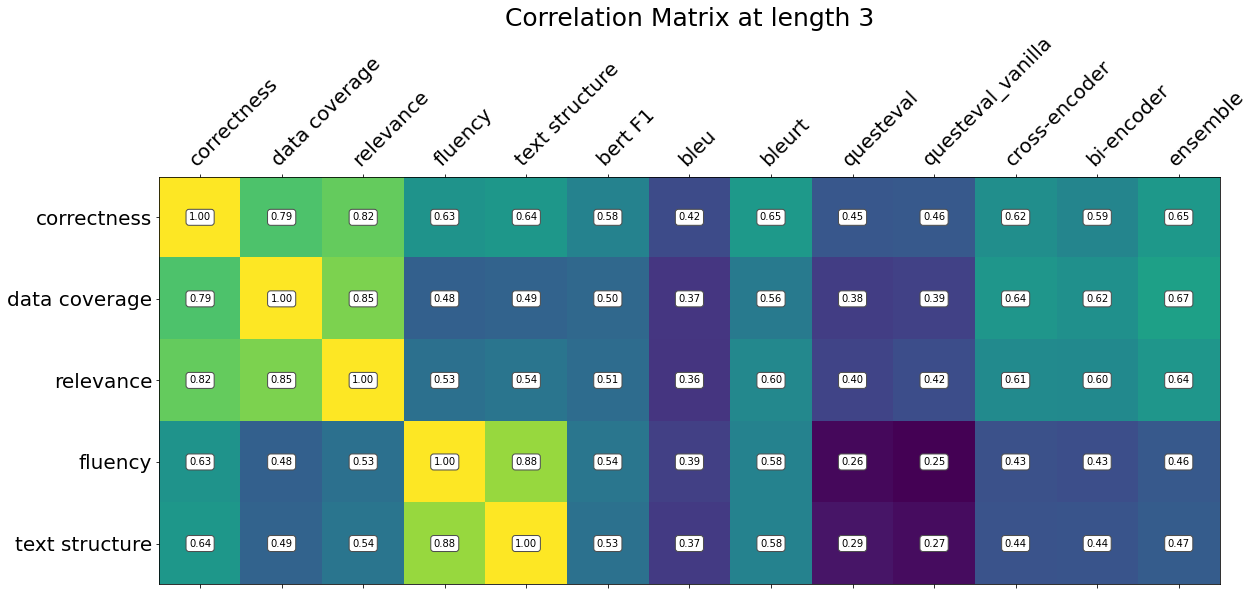

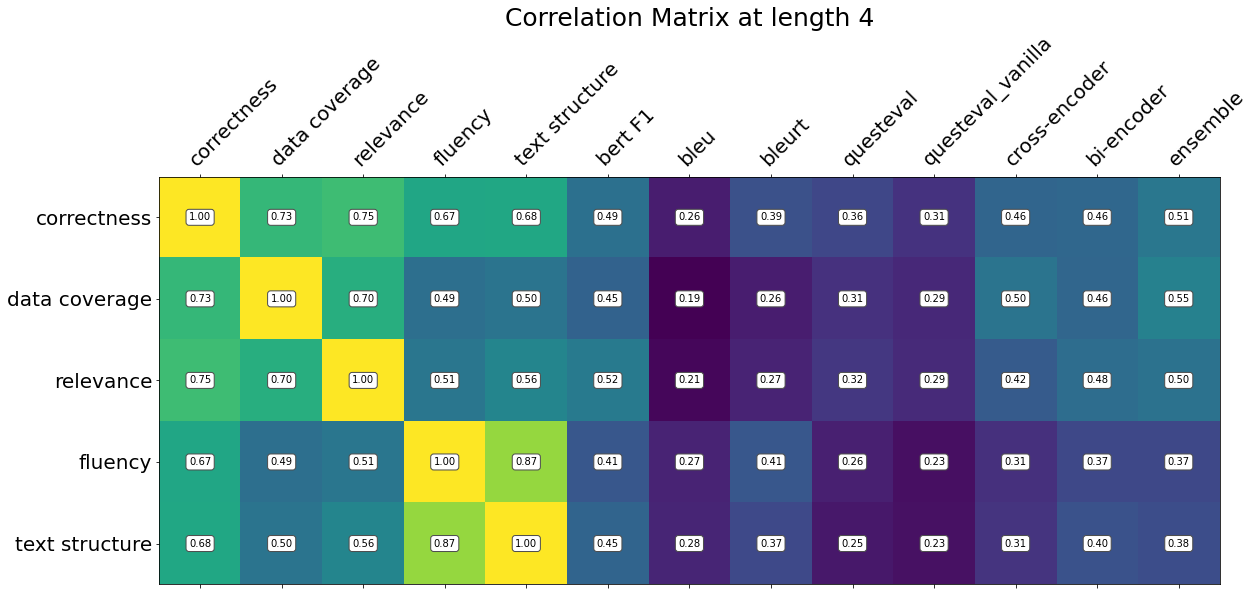

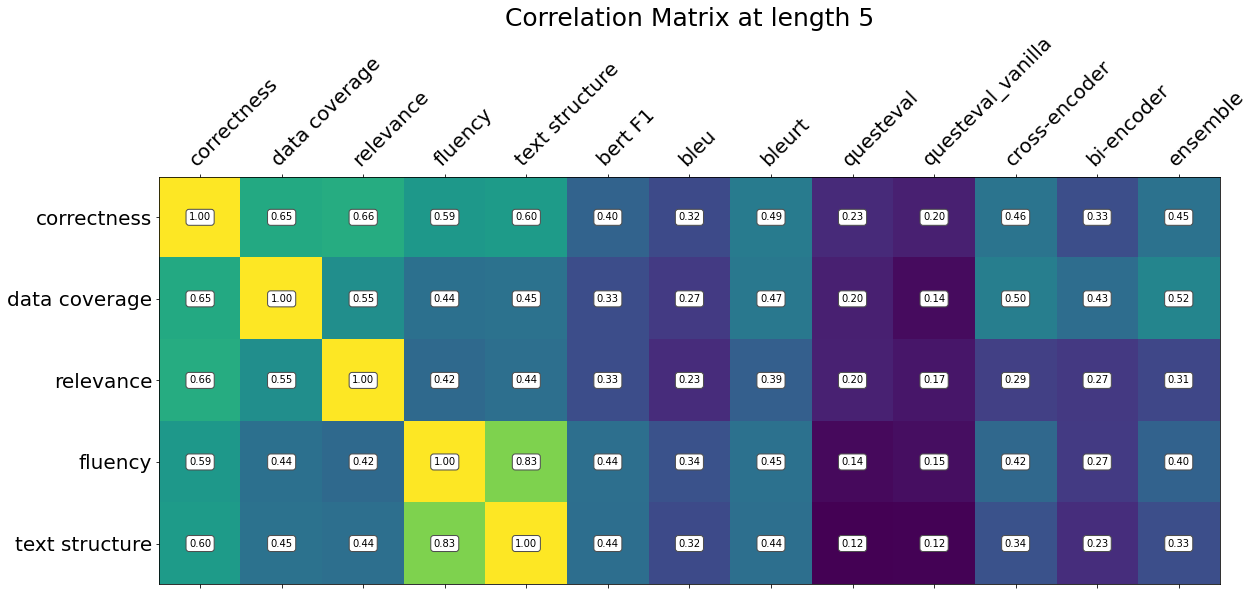

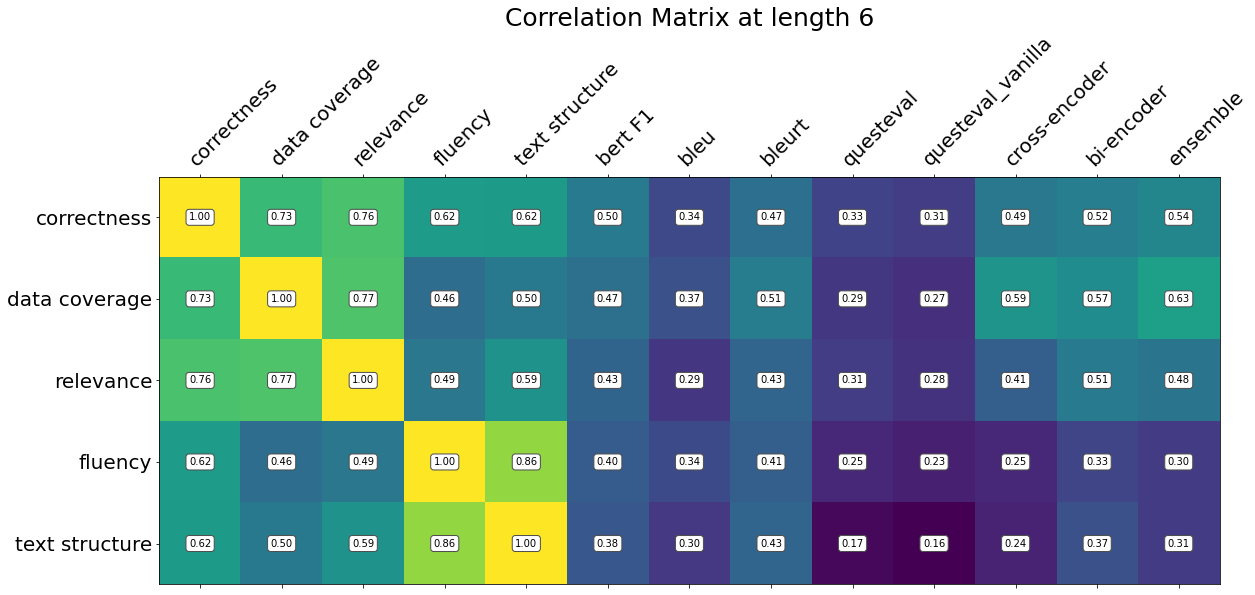

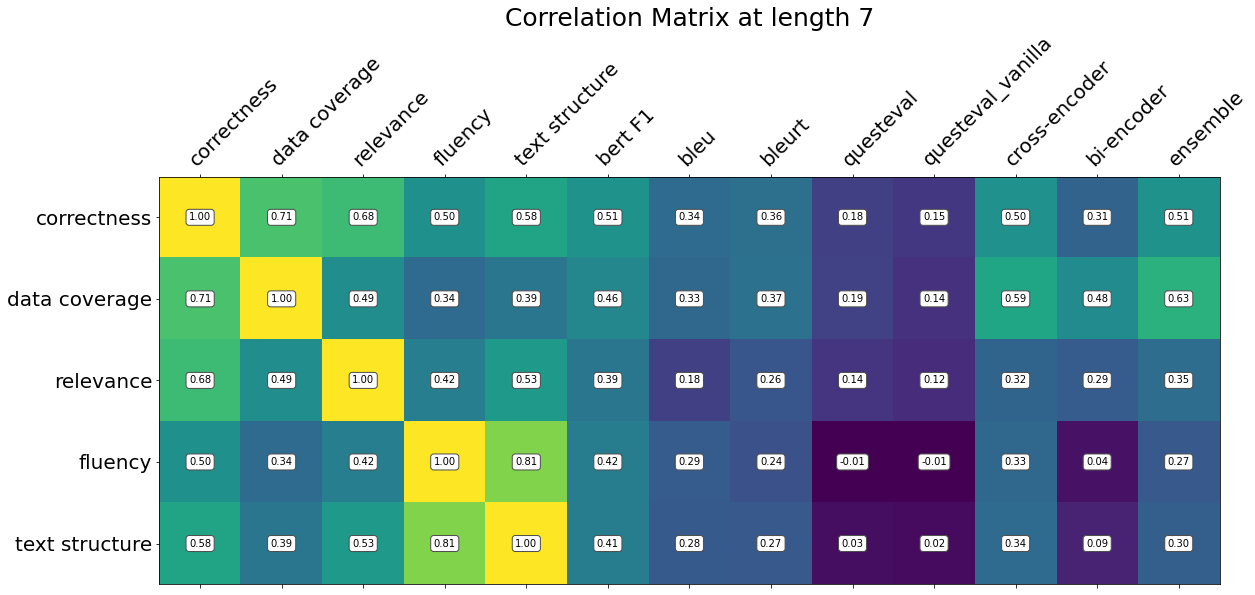

In [37]:
lengths = {len(rdf.split("[O]")) - 1 for rdf in data["rdf"]}

for length in lengths:
    ticks = ['correctness', 'data coverage', 'relevance', 'fluency', 'text structure', 'bert F1', 'bleu', 'bleurt', 'questeval', 'questeval_vanilla',
             'finetuned_cross_all_bs160_allneg',
             'finetuned_bi_all_bs160_allneg',
            'ensemble']
    stacked = np.stack([data[tick] for tick in ticks])
    good_indices = [i for i, rdf in enumerate(data["rdf"]) if len(rdf.split("[O]")) == length + 1]
    stacked = stacked[:, good_indices]    
    
    correlations = np.corrcoef(stacked)
    f = plt.figure(figsize=(19, 15))
    ax = plt.axes()
    ax.matshow(correlations[:5, :])
    for (i, j), z in np.ndenumerate(correlations):
        if i > 4:
            continue
        ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

    ticks = ['correctness', 'data coverage', 'relevance', 'fluency', 'text structure', 'bert F1', 'bleu', 'bleurt', 'questeval', 'questeval_vanilla',  
             'cross-encoder',
             'bi-encoder', 'ensemble']

    plt.xticks(range(len(ticks)), ticks, fontsize=20, rotation=45, ha='left', rotation_mode='anchor')
    plt.yticks(range(5), ticks[:5], fontsize=20)
    # cb = plt.colorbar()
    # cb.ax.tick_params(labelsize=14)
    plt.title(f'Correlation Matrix at length {length}', fontsize=25);

1
2
3
4
5
6
7


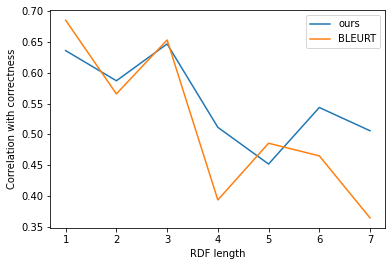

In [35]:
lengths = {len(rdf.split("[O]")) - 1 for rdf in data["rdf"]}

ensemble_correlations = []
bleurt_correlations = []

for length in lengths:
    print(length)
    ticks = ['correctness', 'data coverage', 'relevance', 'fluency', 'text structure', 'bert F1', 'bleu', 'bleurt',
             'finetuned_cross_all_bs160_allneg',
             'finetuned_bi_all_bs160_allneg',
            'ensemble']
    ticks = {tick: i for i, tick in enumerate(ticks)}
    stacked = np.stack([data[tick] for tick in ticks])
    good_indices = [i for i, rdf in enumerate(data["rdf"]) if len(rdf.split("[O]")) == length + 1]
    stacked = stacked[:, good_indices]    
    
    correlations = np.corrcoef(stacked)
    correctness_only = correlations[0]
    
    ensemble_correlations.append(correctness_only[ticks["ensemble"]])
    bleurt_correlations.append(correctness_only[ticks["bleurt"]])
    
ax = plt.gca()
ax.plot(sorted(lengths), ensemble_correlations, label="ours")
ax.plot(sorted(lengths), bleurt_correlations, label="BLEURT")
ax.set_ylabel("Correlation with correctness")
ax.set_xlabel("RDF length")
ax.legend()

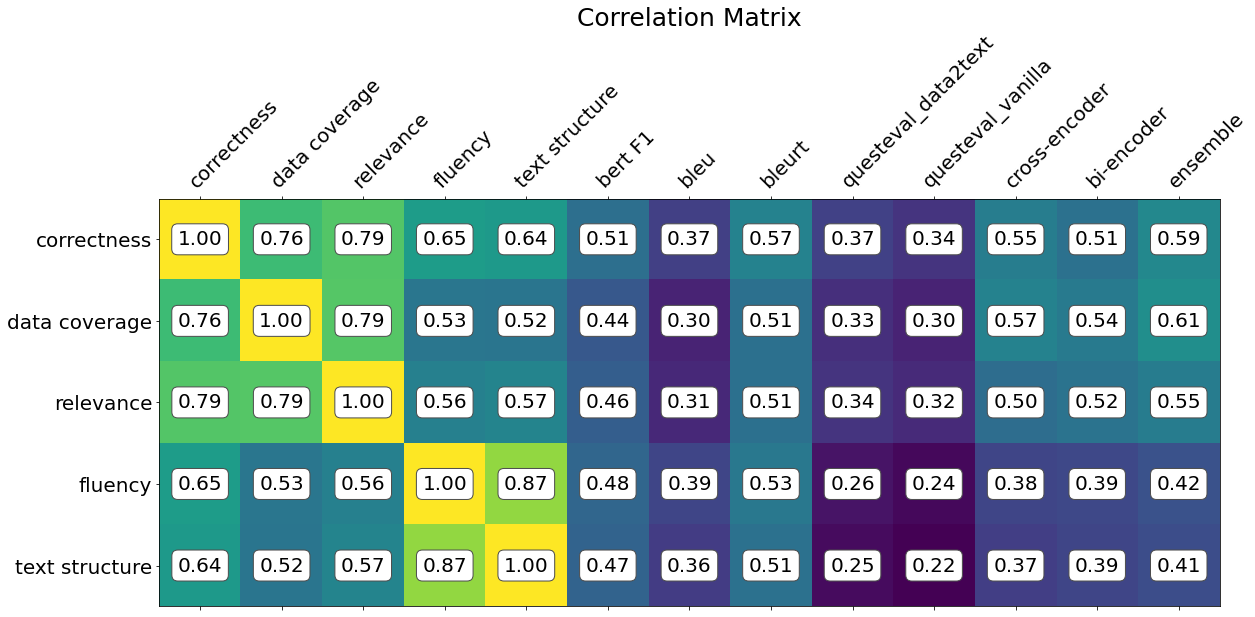

In [42]:
ticks = ['correctness', 'data coverage', 'relevance', 'fluency', 'text structure', 'bert F1', 'bleu', 'bleurt', 'questeval', 'questeval_vanilla',
         'finetuned_cross_all_bs160_allneg',
         'finetuned_bi_all_bs160_allneg',
        'ensemble']

correlations = np.corrcoef(np.stack([data[tick] for tick in ticks]))
f = plt.figure(figsize=(19, 15))
ax = plt.axes()
ax.matshow(correlations[:5, :])
for (i, j), z in np.ndenumerate(correlations):
    if i > 4:
        continue
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', fontsize=20,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    
ticks = ['correctness', 'data coverage', 'relevance', 'fluency', 'text structure', 'bert F1', 'bleu', 'bleurt', 'questeval_data2text', 'questeval_vanilla',  
         'cross-encoder',
         'bi-encoder', 'ensemble']
    
plt.xticks(range(len(ticks)), ticks, fontsize=20, rotation=45, ha='left', rotation_mode='anchor')
plt.yticks(range(5), ticks[:5], fontsize=20)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=25);

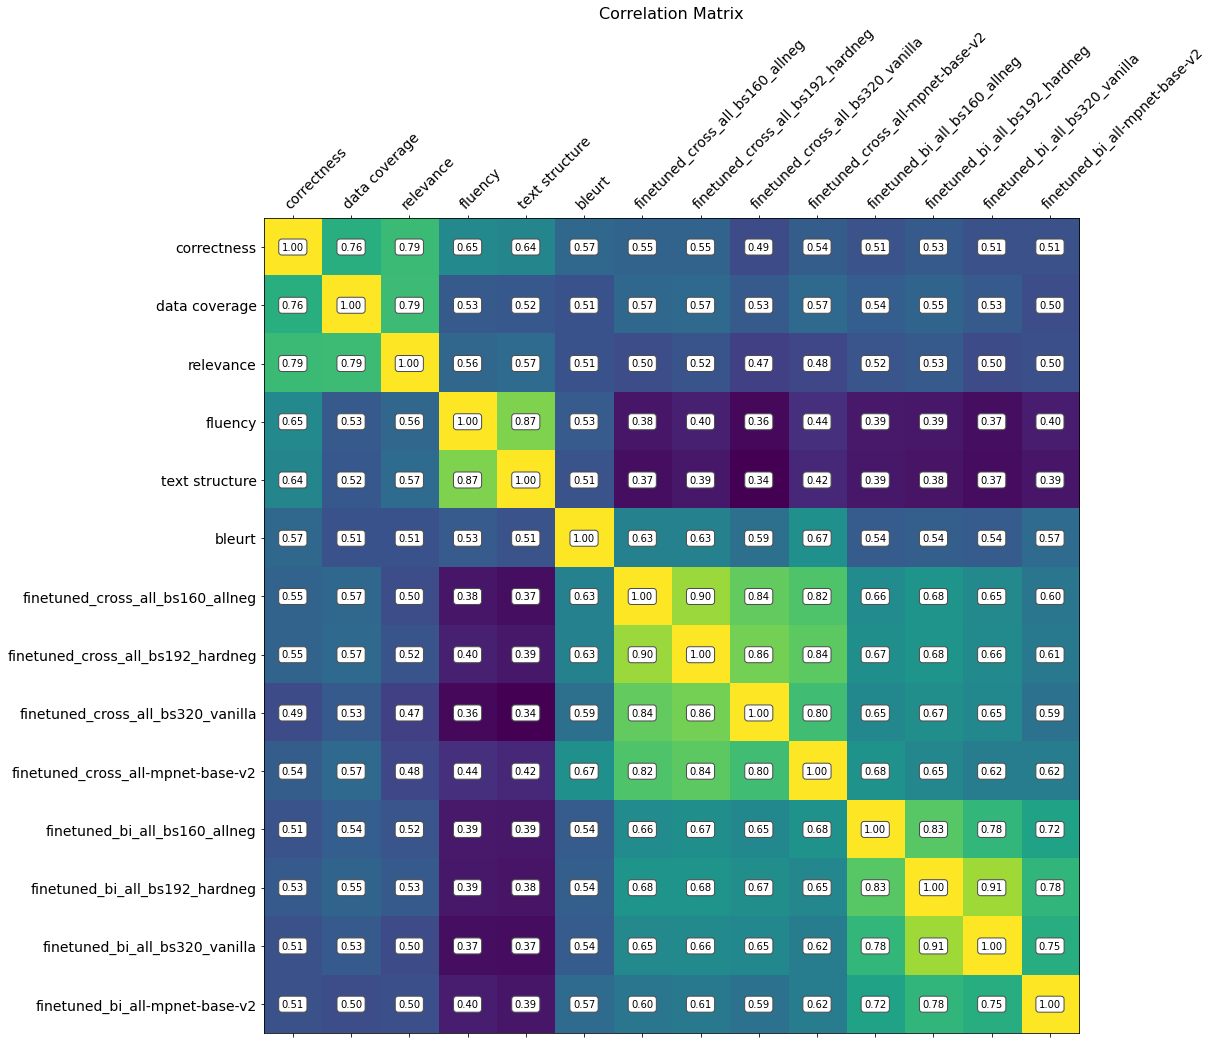

In [72]:
ticks = ['correctness', 'data coverage', 'relevance', 'fluency', 'text structure', 'bleurt',
         'finetuned_cross_all_bs160_allneg', 'finetuned_cross_all_bs192_hardneg',
         'finetuned_cross_all_bs320_vanilla', 'finetuned_cross_all-mpnet-base-v2', 
         'finetuned_bi_all_bs160_allneg', 'finetuned_bi_all_bs192_hardneg',
         'finetuned_bi_all_bs320_vanilla', 'finetuned_bi_all-mpnet-base-v2']

correlations = np.corrcoef(np.stack([data[tick] for tick in ticks]))
f = plt.figure(figsize=(19, 15))
ax = plt.axes()
ax.matshow(correlations)
for (i, j), z in np.ndenumerate(correlations):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
plt.xticks(range(len(ticks)), ticks, fontsize=14, rotation=45, ha='left', rotation_mode='anchor')
plt.yticks(range(len(ticks)), ticks, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

Text(0, 0.5, 'correctness')

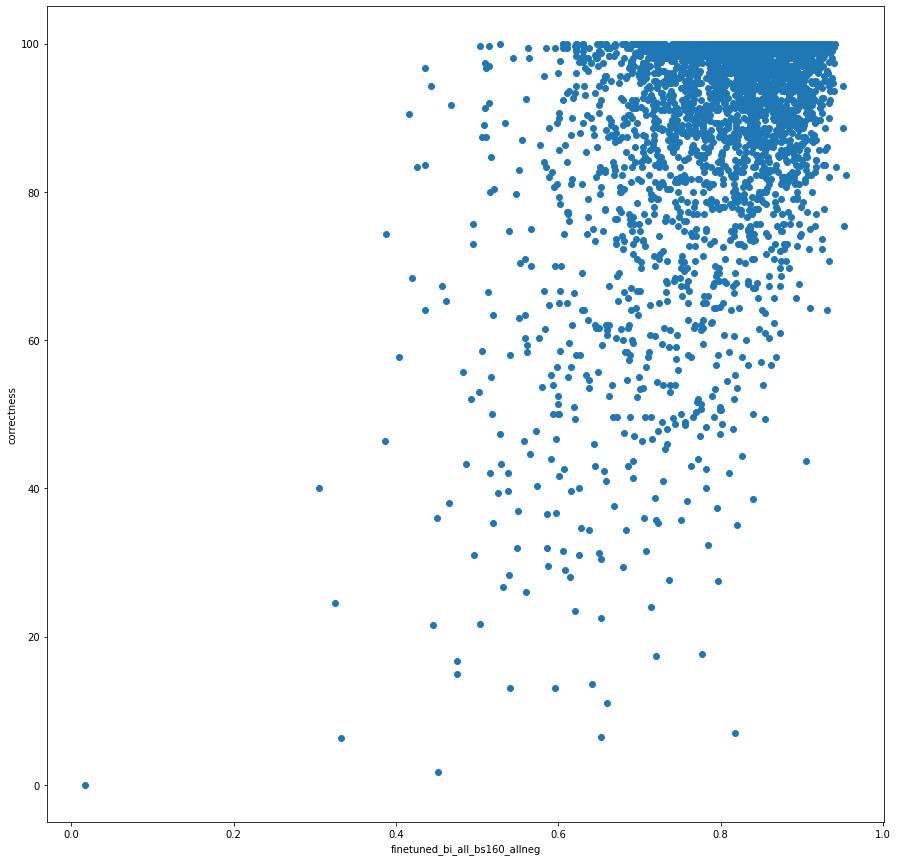

In [101]:
f = plt.figure(figsize=(15, 15))
ax = plt.axes()
ax.scatter(data["finetuned_bi_all_bs160_allneg"], data["correctness"])
ax.set_xlabel("finetuned_bi_all_bs160_allneg")
ax.set_ylabel("correctness")

Text(0, 0.5, 'correctness')

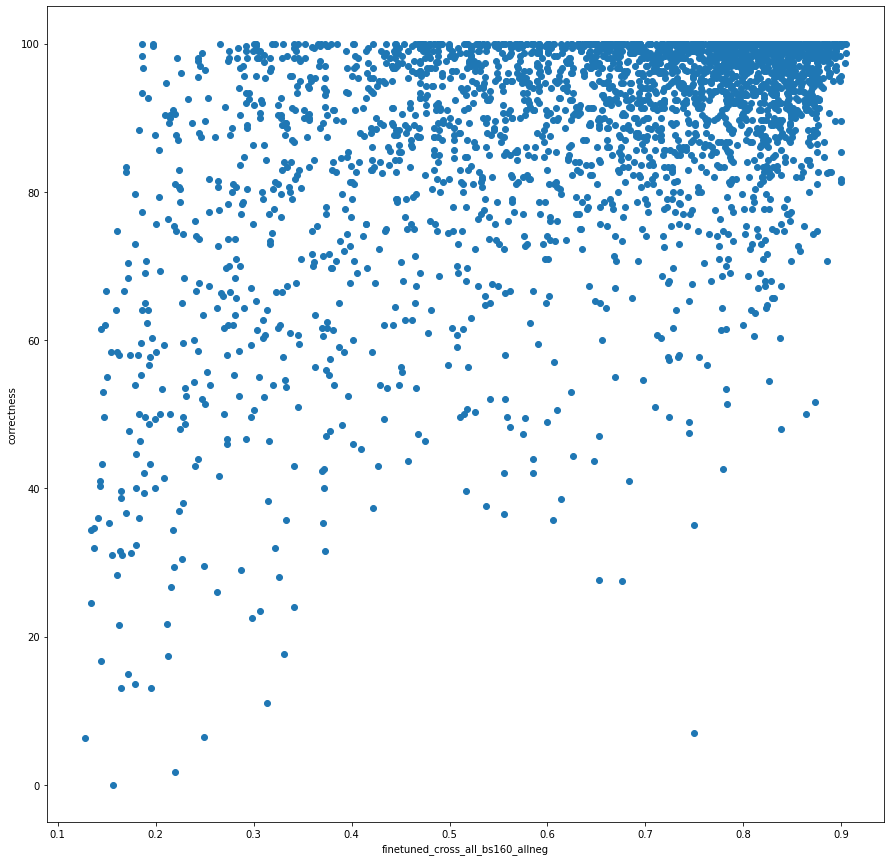

In [100]:
f = plt.figure(figsize=(15, 15))
ax = plt.axes()
ax.scatter(data["finetuned_cross_all_bs160_allneg"], data["correctness"])
ax.set_xlabel("finetuned_cross_all_bs160_allneg")
ax.set_ylabel("correctness")

Text(0, 0.5, 'correctness')

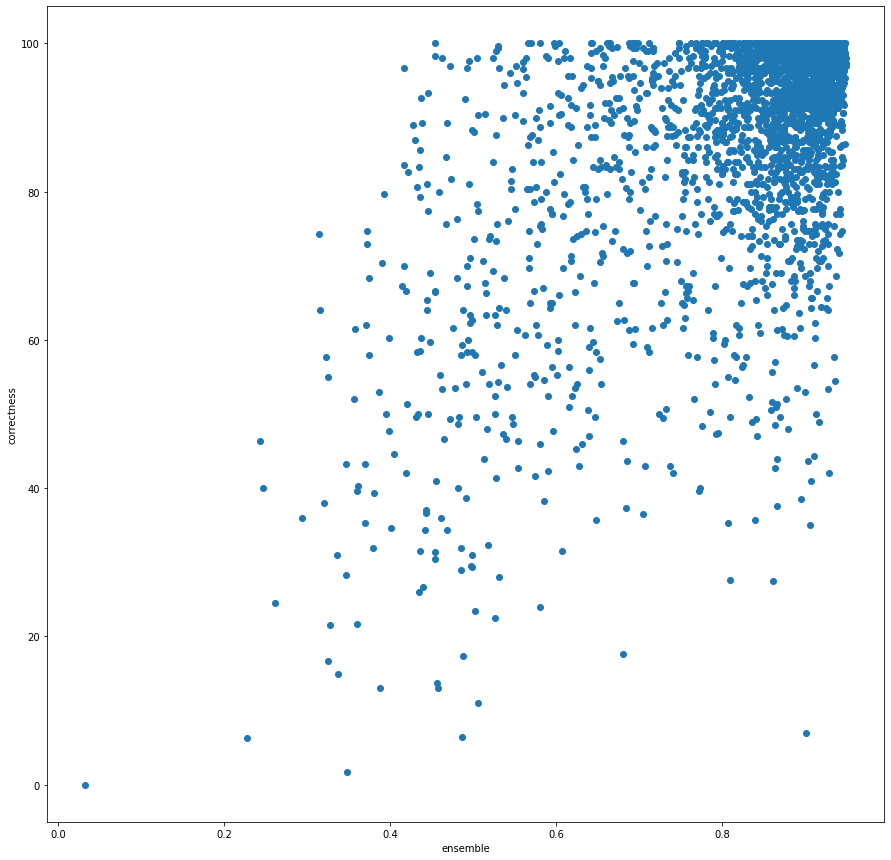

In [43]:
f = plt.figure(figsize=(15, 15))
ax = plt.axes()
ax.scatter(data["ensemble"], data["correctness"])
ax.set_xlabel("ensemble")
ax.set_ylabel("correctness")

In [85]:
candidate_folders = list_subfolders_with_paths = [f.path for f in os.scandir("raw_data/en_submissions_rdf2text") if f.is_dir()]
human_scores = json.load(open("raw_data/english_humeval_data_all_teams.json"))
teams = set([item["submission_id"] for item in human_scores])
human_scores_per_team = {team: [] for team in teams}
for item in human_scores:
    human_scores_per_team[item["submission_id"]].append(item)

rdf_pool = [item for item in open(os.path.join("raw_data", "unwrapped_rdfs.txt")).readlines()[:1779]]
all_rdfs = []
all_hypotheses = []

for candidate_folder in tqdm(candidate_folders):
    team = candidate_folder.split("/")[-1]
    local_hypotheses = open(os.path.join(candidate_folder, "primary.en")).readlines()[:1779]

    for item in human_scores_per_team[team]:
        sample_id = int(item["sample_id"]) - 1
        # our score
        all_hypotheses.append(local_hypotheses[sample_id][:-1])
        all_rdfs.append(rdf_pool[sample_id][:-1])
        # automatic scores

100%|██████████| 16/16 [00:00<00:00, 807.13it/s]


In [87]:
differences = np.array(data["finetuned_bi_all_bs160_allneg"]) - np.array(data["finetuned_cross_all_bs160_allneg"])

In [88]:
len(data["finetuned_bi_all_bs160_allneg"])

2847

In [89]:
top_k = 10
cross_advantage = np.argpartition(differences, -top_k)[-top_k:]
bi_advantage = np.argpartition(differences, top_k)[:top_k]

In [90]:
differences[cross_advantage]

array([0.5889829 , 0.59303667, 0.59650081, 0.61803056, 0.63372418,
       0.60351695, 0.60142815, 0.60271218, 0.62707153, 0.59603426])

In [91]:
differences[bi_advantage]

array([-0.22135687, -0.23511922, -0.19653249, -0.26445252, -0.40430534,
       -0.19708765, -0.19563872, -0.18669844, -0.18704206, -0.18390346])

In [92]:
cross_advantage

array([2345,  566,  687,  623,  562,  637,  563, 1997, 2495, 1223])

In [97]:
for item in bi_advantage:
    print(all_hypotheses[item])
    print(all_rdfs[item])
    print(data["finetuned_bi_all_bs160_allneg"][item], data["finetuned_cross_all_bs160_allneg"][item], data["correctness"][item])
    print()

Bionico includes granola as one of its ingredients and is from the Jalisco region of Mexico. The currency used in this country is the Mexican peso and the people that live there are called Mexicans.
[S] Mexico [P] currency [O] Mexican_peso [S] Mexico [P] demonym [O] Mexicans [S] Bionico [P] ingredient [O] Granola [S] Bionico [P] region [O] Jalisco [S] Bionico [P] country [O] Mexico
0.5627719759941101 0.7841288447380066 99.33333333333333

Granola is an ingredient in Bionico, a dish from the Jalisco region of Mexico. Mexicans are the people occupying Mexico and the currency is the Mexican peso.
[S] Mexico [P] currency [O] Mexican_peso [S] Mexico [P] demonym [O] Mexicans [S] Bionico [P] ingredient [O] Granola [S] Bionico [P] region [O] Jalisco [S] Bionico [P] country [O] Mexico
0.5889943838119507 0.8241136074066162 64.66666666666667

Abdul Taib Mahmud lives in Demak Jaya, Jalan Bako, Kuching, Sarawak and is a member of the Parti Pesaka Bumiputera Bersatu.
[S] Abdul_Taib_Mahmud [P] residen

In [98]:
for item in cross_advantage:
    print(all_hypotheses[item])
    print(all_rdfs[item])
    print(data["finetuned_bi_all_bs160_allneg"][item], data["finetuned_cross_all_bs160_allneg"][item], data["correctness"][item])
    print()

Mermaid ( Train) was followed by Imagine ( John Lennon song).
[S] Mermaid_(Train_song) [P] followedBy [O] Imagine_(John_Lennon_song)
0.8066445589065552 0.21766166388988495 91.0

Imagine follows Mermaid.
[S] Mermaid_(Train_song) [P] followedBy [O] Imagine_(John_Lennon_song)
0.7824072241783142 0.1893705576658249 65.0

Andrzej Piotr Ruszczyński is known for the Stochastic programming.
[S] Andrzej_Piotr_Ruszczyński [P] knownFor [O] Stochastic_programming
0.787517786026001 0.19101697206497192 62.333333333333336

Bootleg Series Volume 1: The Quine Tapes, the runtime of which is 230.05, was released on October 16, 2001.
[S] Bootleg_Series_Volume_1:_The_Quine_Tapes [P] releaseDate [O] 2001-10-16 [S] Bootleg_Series_Volume_1:_The_Quine_Tapes [P] runtime [O] 230.05
0.8362640738487244 0.21823351085186005 75.33333333333333

Agremiação Sportiva Arapiraquense play in Campeonato Brasileiro Série C, the champions of which are Vila Nova Futebol Clube. They played in the 2015 season. They play their home